In [1]:
import detrending_functions as dtr

### File Paths

In [2]:
meter_path = 'example_data/djembedancedata/BKO_E1_D1_02_Maraka_C_Marker in sec.csv'
D1_path = 'example_data/djembedancedata/BKO_E1_D1_02_Maraka_P-Dun_vamp_bbc-vamp-plugins_bbc-rhythm_onset.csv'
J1_path = 'example_data/djembedancedata/BKO_E1_D1_02_Maraka_P-Jem-1_vamp_bbc-vamp-plugins_bbc-rhythm_onset.csv'
J2_path = 'example_data/djembedancedata/BKO_E1_D1_02_Maraka_P-Jem-2_vamp_bbc-vamp-plugins_bbc-rhythm_onset.csv'

### Load Onset annotations

In [3]:
onsets_df = dtr.load_df_csv([D1_path, J1_path, J2_path], delimiter=';', concat_axis=1, header=None)

# Add header to the dataframe
onsets_df.columns = ['D1', 'J1', 'J2']
onsets_df.head(10)

,D1,J1,J2
0,8.551000,5.881667,10.951000
1,10.073667,6.143000,11.161667
2,10.484333,6.335000,11.569667
3,10.889667,6.428333,11.785667
4,11.127000,6.543000,12.207000
5,11.583000,6.633667,12.420333
6,12.009667,6.793667,12.844333
7,12.668333,7.012333,13.068333
8,13.068333,7.220333,13.497667
9,13.481667,7.452333,13.735000


### Load Meter annotations

In [4]:
meter_df = dtr.load_df_csv(meter_path, delimiter=';')
meter_df.columns = ['Keyboard.Time']
meter_df.head()

,Keyboard.Time
0,11.129
1,13.706
2,16.260
3,18.728
4,21.223


### Select subdivisions, window shape (tolerance)

In [5]:
num_div = 12
tolerance = (0.5, 0.5)

## Detrending

### Mode 2 : Intermediate "instrument anchor" (level 2 m.cycle) 

['downbeats to onsets' eq.]
1. Closest instrument (mixed) [choose closest onset to lev1, either instr1 or
instr2]
2. defined.instr.rules [take window, show preference for defined.instr, e.g.
If there is an instr1 stroke in the window select it, else go for the instr2]


#### Mode 2.1 : Instrument Anchor - Closest Instrument

In [6]:
defined_instr = ['J1'] 

In [7]:
meter_df = dtr.detrend_anchor(meter_df, 
                           time_column='Keyboard.Time', 
                           instr_df=onsets_df[defined_instr], 
                           tolerance=tolerance, 
                           num_div=num_div, 
                           mode='closest.instr',
                           col_name='Anchor.Time.1')

In [8]:
meter_df.head()

,Keyboard.Time,Anchor.Time.1
0,11.129,11.108333
1,13.706,13.497667
2,16.260,16.249667
3,18.728,18.729667
4,21.223,21.025667


### Mode 2.2 : Instrument Anchor - defined.instr.rules

For this sub-mode, order of preference is assumed in the list. For example in the list below D1 > J1 > J2

In [9]:
defined_instr = ['D1', 'J1', 'J2']

In [10]:
meter_df = dtr.detrend_anchor(meter_df, 
                           time_column='Keyboard.Time', 
                           instr_df=onsets_df[defined_instr], 
                           tolerance=tolerance, 
                           num_div=num_div, 
                           mode='defined.instr',
                           col_name='Anchor.Time.2')

In [11]:
meter_df.tail()

,Keyboard.Time,Anchor.Time.1,Anchor.Time.2
203,331.530,331.513667,331.529667
204,332.748,332.751000,332.767000
205,333.981,333.993667,334.009667
206,335.231,335.255000,335.233667
207,336.578,336.593667,336.580333


## Assign Onsets to Subdivisions

### Construct new dataframe assigning onsets to subdivisions  
[Equivalent to onsets_to_metrical_grid() in carat]

In [12]:
df1 = dtr.assign_onsets_to_cycles(onsets_df, cycle_time=meter_df['Keyboard.Time'], tolerance=tolerance, num_div=num_div)
df1.head(13)

,Cycle,CycleTime,SD,Iso.Time,D1,J1,J2
0,1,11.129,1,11.12900,11.127000,11.108333,11.161667
1,1,NaN,2,11.34375,NaN,11.343000,NaN
2,1,NaN,3,11.55850,11.583000,11.553667,11.569667
3,1,NaN,4,11.77325,NaN,11.748333,11.785667
4,1,NaN,5,11.98800,12.009667,11.996333,NaN
5,1,NaN,6,12.20275,NaN,12.217667,12.207000
6,1,NaN,7,12.41750,NaN,NaN,12.420333
7,1,NaN,8,12.63225,12.668333,12.647000,NaN
8,1,NaN,9,12.84700,NaN,12.863000,12.844333
9,1,NaN,10,13.06175,13.068333,13.057667,13.068333


### Normalise onsets to cycles  
[Equivalent to normalize_onsets() in carat]

In [13]:
norm_df1 = dtr.normalize_onsets_df(df1, inst=['D1', 'J1', 'J2'])
norm_df1.head(13)

,Cycle,CycleTime,SD,Iso.Time,D1,J1,J2,D1_norm,J1_norm,J2_norm
0,1,11.129,1,11.12900,11.127000,11.108333,11.161667,-0.000776,-0.008020,0.012676
1,1,NaN,2,11.34375,NaN,11.343000,NaN,NaN,0.083042,NaN
2,1,NaN,3,11.55850,11.583000,11.553667,11.569667,0.176174,0.164791,0.171000
3,1,NaN,4,11.77325,NaN,11.748333,11.785667,NaN,0.240331,0.254818
4,1,NaN,5,11.98800,12.009667,11.996333,NaN,0.341741,0.336567,NaN
5,1,NaN,6,12.20275,NaN,12.217667,12.207000,NaN,0.422455,0.418316
6,1,NaN,7,12.41750,NaN,NaN,12.420333,NaN,NaN,0.501099
7,1,NaN,8,12.63225,12.668333,12.647000,NaN,0.597335,0.589057,NaN
8,1,NaN,9,12.84700,NaN,12.863000,12.844333,NaN,0.672875,0.665632
9,1,NaN,10,13.06175,13.068333,13.057667,13.068333,0.752555,0.748415,0.752555


## Plot Onsets in Cycles

Equivalent to onsets_in_grid_plot() in carat

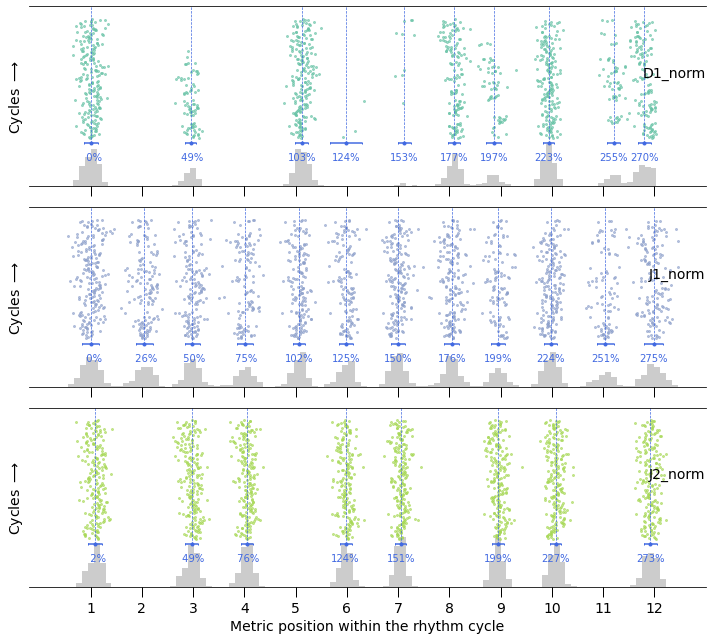

In [14]:
dtr.plot_cycle_onsets(norm_df1, instr=['D1_norm','J1_norm', 'J2_norm'], mean_std=True, hist_ons=True)

## Comparison

##### Using Anchor.Time.1 as Cycle Time

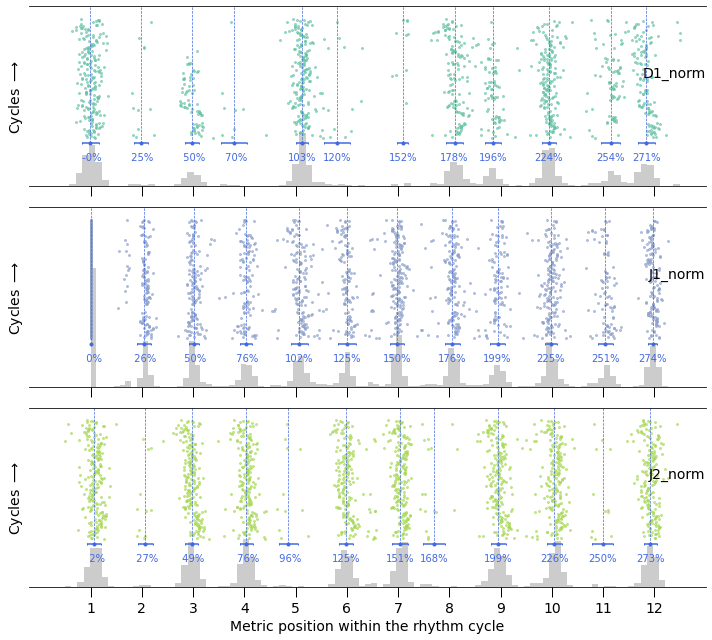

In [15]:
# Assign
df2 = dtr.assign_onsets_to_cycles(onsets_df, cycle_time=meter_df['Anchor.Time.1'], tolerance=tolerance, num_div=num_div)
# Normalize
norm_df2 = dtr.normalize_onsets_df(df2, inst=['D1', 'J1', 'J2'])
# Plot
dtr.plot_cycle_onsets(norm_df2, instr=['D1_norm', 'J1_norm', 'J2_norm'], mean_std=True, hist_ons=True)

##### Using Anchor.Time.2 as Cycle Time

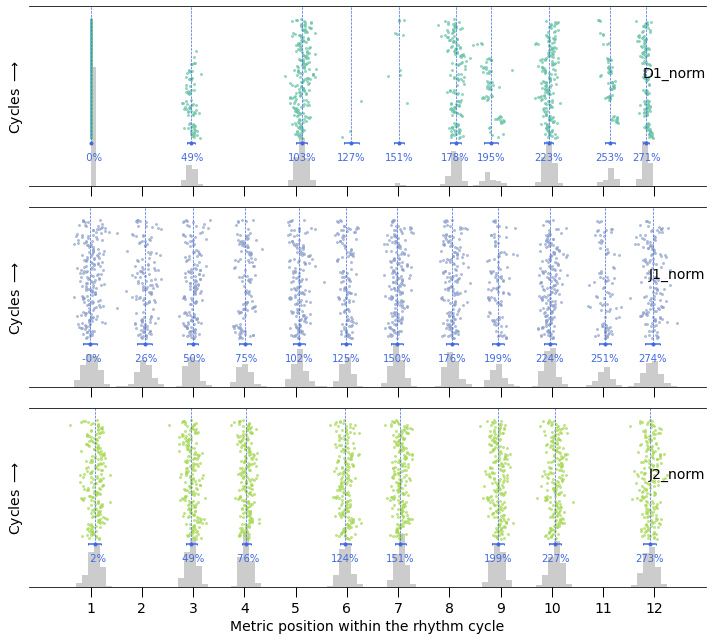

In [16]:
# Assign
df3 = dtr.assign_onsets_to_cycles(onsets_df, cycle_time=meter_df['Anchor.Time.2'], tolerance=tolerance, num_div=num_div)
# Normalize
norm_df3 = dtr.normalize_onsets_df(df3, inst=['D1', 'J1', 'J2'])
# Plot
dtr.plot_cycle_onsets(norm_df3, instr=['D1_norm', 'J1_norm', 'J2_norm'], mean_std=True, hist_ons=True)